In [86]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from scipy.stats import kstest, ks_2samp, t, normaltest, norm, chisquare
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from distribution import Distribution

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
data = pd.read_csv("https://raw.githubusercontent.com/erdemsirel/ozu_data_science/master/M4%20-%20Applied%20Machine%20Learning%20-%20II/Call%20Details-Data.csv")
data

,Phone Number,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,382-4657,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,371-7191,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,358-1921,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,375-9999,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,330-6626,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101169,789-9756,222,0,228.2,60,22.82,229.8,289,28.26,222.8,222,2.28,6.2,2,2.62,2,False
101170,798-5885,88,0,282.2,222,82.88,208.8,220,22.82,282.2,200,20.68,9.8,8,2.82,8,False
101171,798-5798,22,0,222.2,62,88.66,228.0,228,22.08,62.2,209,2.26,2.8,6,2.22,2,False
101172,999-9897,228,0,222.0,99,88.08,220.2,80,22.92,282.9,28,20.22,2.2,8,0.82,0,False


In [88]:
var = data['Intl Charge']

var1, var2 = train_test_split(var, test_size=0.33)

In [91]:
d1 = Distribution(var1, bins=10)
d2 = Distribution(var2, bins=10)

In [92]:
d1

dict_keys(['bins', 'pdf_', 'cdf_', 'dist_q', 'dist_q_bins', 'stats', 'count', 'mean', 'std', 'min', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', 'max'])

In [65]:
vars(d).keys()

dict_keys(['bins', 'pdf_', 'cdf_', 'dist_q', 'dist_q_bins', 'stats'])

In [4]:
normaltest(s)

NormaltestResult(statistic=7524.321635067164, pvalue=0.0)

In [216]:
kstest(X_test.mileage, X_train.mileage)

KstestResult(statistic=0.020833735754297856, pvalue=0.43076170727755936)

In [217]:
kstest(X_test.mileage, lambda x: metrics.cdf(x, X_train.mileage, bins=100))


KstestResult(statistic=0.14415322580645162, pvalue=6.454171373044088e-49)

In [218]:
a = np.random.normal(X_train.mileage.mean(), X_train.mileage.std(), size=len(X_train.mileage))
kstest(a, lambda x: metrics.cdf(x, X_train.mileage, bins=100))

KstestResult(statistic=0.14415322580645162, pvalue=2.0890080903811414e-90)

In [219]:
kstest(a, X_train.mileage)

KstestResult(statistic=0.1465725806451613, pvalue=7.260004093775498e-47)

In [213]:
X_train.mileage.value_counts(bins=5, normalize=True).sort_index().cumsum()

(-258.0, 51800.8]       0.875000
(51800.8, 103600.6]     0.987702
(103600.6, 155400.4]    0.998185
(155400.4, 207200.2]    0.999597
(207200.2, 259000.0]    1.000000
Name: mileage, dtype: float64

In [214]:
%load_ext autoreload
%autoreload 2

import metrics

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [121]:
ref_var = X_train.engineSize
var = X_test.engineSize
print(metrics.abs_difference_of_means(ref_var, var))
print(metrics.relative_abs_difference_of_means(ref_var, var))
print(metrics.relative_wasserstein_varance(ref_var, var))
print(metrics.is_var_within_z_threshold(ref_var, var, z_threshold=1))
print(metrics.is_ks_successfull(ref_var, var))
print(metrics.is_vars_normal(ref_var, var))
print(metrics.psi(ref_var, var))


0.010729790419147012
0.005050798667441935
0.011276652344032087
True
True
None
0.0033215917418785287


In [1]:
X_train.describe()

NameError: name 'X_train' is not defined

In [42]:
X_test.describe()

,carID,year,mileage,tax,mpg,engineSize
count,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000
mean,15784.043039,2016.720434,24617.528443,153.261602,49.787275,2.135105
std,2197.045979,2.898906,23142.032992,80.742530,35.269981,0.768596
min,12000.000000,1970.000000,1.000000,0.000000,2.800000,0.000000
25%,13889.750000,2016.000000,6000.000000,145.000000,37.700000,1.600000
50%,15777.500000,2017.000000,18548.000000,145.000000,47.100000,2.000000
75%,17661.500000,2019.000000,36272.250000,160.000000,54.300000,2.800000
max,19631.000000,2020.000000,167054.000000,580.000000,470.800000,6.300000


<AxesSubplot:>

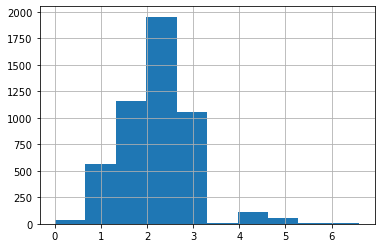

In [101]:
ref_var.hist()

In [110]:
ref_dist, ref_dist_bins = pd.cut(ref_var, 10, retbins=True)
ref_dist = ref_dist.value_counts(normalize=True)

In [113]:
var_dist = pd.cut(var, bins=ref_dist_bins).value_counts(normalize=True)

In [120]:
PSI=((var_dist - ref_dist) * np.log(var_dist / ref_dist)).sum()
PSI

0.0033215917418785287

In [118]:
np.log(var_dist / ref_dist)

(-0.0066, 0.66]    0.107753
(0.66, 1.32]      -0.114357
(1.32, 1.98]      -0.006902
(1.98, 2.64]       0.023391
(2.64, 3.3]        0.020913
(3.3, 3.96]       -0.228719
(3.96, 4.62]       0.048034
(4.62, 5.28]       0.002392
(5.28, 5.94]      -0.680704
(5.94, 6.6]       -0.990859
Name: engineSize, dtype: float64

In [130]:
ref_dist, ref_dist_bins = pd.qcut(ref_var, 4, retbins=True)
ref_dist = ref_dist.value_counts(normalize=True)

var_dist = pd.cut(var, bins=ref_dist_bins).value_counts(normalize=True)
var_dist

(1.6, 2.0]    0.340128
(0.0, 1.6]    0.268026
(2.8, 6.6]    0.251793
(2.0, 2.8]    0.140053
Name: engineSize, dtype: float64

In [139]:
def cdf(x, X):
    pd.qcut(ref_var, 4, retbins=True)

(0          (2.0, 2.8]
 1          (1.6, 2.0]
 2          (2.8, 6.6]
 3          (1.6, 2.0]
 4       (-0.001, 1.6]
             ...      
 4955       (2.0, 2.8]
 4956       (2.8, 6.6]
 4957       (1.6, 2.0]
 4958       (2.8, 6.6]
 4959       (2.8, 6.6]
 Name: engineSize, Length: 4960, dtype: category
 Categories (4, interval[float64, right]): [(-0.001, 1.6] < (1.6, 2.0] < (2.0, 2.8] < (2.8, 6.6]],
 array([0. , 1.6, 2. , 2.8, 6.6]))

In [155]:
ref_var.value_counts(bins=10, normalize=True).sort_index().cumsum().loc[2]

0.7487903225806452

In [159]:
pdf_ = ref_var.value_counts(bins=10, normalize=True).sort_index().cumsum()
a.iloc[a.index.get_loc(5)]

(-0.0076, 0.66]    0.008065
(0.66, 1.32]       0.121774
(1.32, 1.98]       0.355040
(1.98, 2.64]       0.748790
(2.64, 3.3]        0.962097
(3.3, 3.96]        0.963508
(3.96, 4.62]       0.986694
(4.62, 5.28]       0.996774
(5.28, 5.94]       0.998992
(5.94, 6.6]        1.000000
Name: engineSize, dtype: float64

0.9967741935483873